### Capstone 3: Data Wrangling - Snowflake Cloud Datawarehouse vs. On-Prem MSSQL Comparison

#### Import Relevant Packages

In [1]:
import pandas as pd 
import sqlalchemy 
import matplotlib.pyplot as plt 
import pyodbc
from snowflake.connector.pandas_tools import write_pandas
import snowflake.connector
import os 
import warnings


warnings.filterwarnings("ignore")

#### Connect to Local MSSQL Instance and Load SQL Query

In [2]:
# Define connection string
connection_string = 'mssql+pyodbc://REHAN-DESKTOP\SQLEXPRESS/AdventureWorks2022?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'


# Create SQLAlchemy Engine
engine = sqlalchemy.create_engine(connection_string)

# SQL query
query = """ SELECT
    SOH.SalesOrderID,
    SOH.OrderDate,
    P.ProductID,
    P.Name AS ProductName,
    SOD.OrderQty,
    SOD.UnitPrice,
    SOD.LineTotal
FROM
Sales.SalesOrderHeader AS SOH
JOIN Sales.SalesOrderDetail AS SOD ON SOH.SalesOrderID = SOD.SalesOrderID
JOIN Sales.Customer AS C ON SOH.CustomerID = C.CustomerID
JOIN Production.Product AS P ON SOD.ProductID = P.ProductID
ORDER BY SOH.OrderDate DESC """


#### Connect to Snowflake Cloud Instance

In [3]:
# Add Connection Parameters
snowflake_conn = snowflake.connector.connect(
    user='REHANK1990',
    password='Bismillah!1',
    account='sajugab-fma81222',
    warehouse='COMPUTE_WH',
    database='ADVENTUREWORKS2022',
    schema='ADVENTUREWORKS2022',
    role='ACCOUNTADMIN'
)

    
snowflake_query="""SELECT
    SOH.SalesOrderID,
    SOH.OrderDate,
    P.ProductID,
    P.Name AS ProductName,
    SOD.OrderQty,
    SOD.UnitPrice,
    SOD.LineTotal
FROM "Sales.SalesOrderHeader" AS SOH
JOIN "Sales.SalesOrderDetail" AS SOD ON SOH.SalesOrderID = SOD.SalesOrderID
JOIN "Sales.Customer" AS C ON SOH.CustomerID = C.CustomerID
JOIN "Production.Product" AS P ON SOD.ProductID = P.ProductID
ORDER BY SOH.OrderDate DESC"""


#### Add Both Queries Into Dataframe

###### MSSQL Dataframe


In [4]:
# Execute query and read data into DataFrame (MSSQL)
sql_df = pd.read_sql(query, engine)

# Perform data analysis or manipulation
print(sql_df.head())  # Display first few rows of DataFrame

#capture df load time
sql_load_seconds = 7.8

   SalesOrderID  OrderDate  ProductID            ProductName  OrderQty  \
0         75084 2014-06-30        876    Hitch Rack - 4-Bike         1   
1         75085 2014-06-30        712           AWC Logo Cap         1   
2         75085 2014-06-30        877  Bike Wash - Dissolver         1   
3         75086 2014-06-30        877  Bike Wash - Dissolver         1   
4         75087 2014-06-30        707  Sport-100 Helmet, Red         1   

   UnitPrice  LineTotal  
0     120.00     120.00  
1       8.99       8.99  
2       7.95       7.95  
3       7.95       7.95  
4      34.99      34.99  


###### Snowflake Dataframe


In [5]:
# Create a DataFrame using fetched rows and column names
snowflake_df = pd.read_sql(snowflake_query, snowflake_conn)

# Close the cursor and connection when done
#cursor.close()
#snowflake_conn.close()

# Now you can work with the DataFrame
print(snowflake_df.head(10))  # Display the first few rows of the DataFrame

#Snowflake Load Time 
snowflake_load_seconds = 0.6

   SALESORDERID  ORDERDATE  PRODUCTID                      PRODUCTNAME  \
0         75119 2014-06-30        873              Patch Kit/8 Patches   
1         75123 2014-06-30        712                     AWC Logo Cap   
2         75123 2014-06-30        879           All-Purpose Bike Stand   
3         75123 2014-06-30        878            Fender Set - Mountain   
4         75122 2014-06-30        712                     AWC Logo Cap   
5         75122 2014-06-30        878            Fender Set - Mountain   
6         75121 2014-06-30        707            Sport-100 Helmet, Red   
7         75121 2014-06-30        930                 HL Mountain Tire   
8         75120 2014-06-30        712                     AWC Logo Cap   
9         75120 2014-06-30        884  Short-Sleeve Classic Jersey, XL   

   ORDERQTY  UNITPRICE  LINETOTAL  
0         1          2          2  
1         1          9          9  
2         1        159        159  
3         1         22         22  
4    

#### Set Column Names to Match

In [6]:
#set snowflake df columns to be the same as sql df
snowflake_df.columns = sql_df.columns 
print(sql_df.columns)

Index(['SalesOrderID', 'OrderDate', 'ProductID', 'ProductName', 'OrderQty',
       'UnitPrice', 'LineTotal'],
      dtype='object')


#### Check Data Types in Both Dataframes

In [7]:
#check datatypes for sql df
sql_df.dtypes

SalesOrderID             int64
OrderDate       datetime64[ns]
ProductID                int64
ProductName             object
OrderQty                 int64
UnitPrice              float64
LineTotal              float64
dtype: object

In [8]:
#check datatypes for snowflake df
snowflake_df.dtypes

SalesOrderID             int64
OrderDate       datetime64[ns]
ProductID                int64
ProductName             object
OrderQty                 int64
UnitPrice                int64
LineTotal                int64
dtype: object

In [9]:
#change snowflake dtypes to match sql_df
snowflake_df[['UnitPrice', 'LineTotal']] = snowflake_df[['UnitPrice', 'LineTotal']].astype('float64')

In [10]:
snowflake_df.dtypes

SalesOrderID             int64
OrderDate       datetime64[ns]
ProductID                int64
ProductName             object
OrderQty                 int64
UnitPrice              float64
LineTotal              float64
dtype: object

### EDA on Both Dataframes

###### Snowflake Dataframe


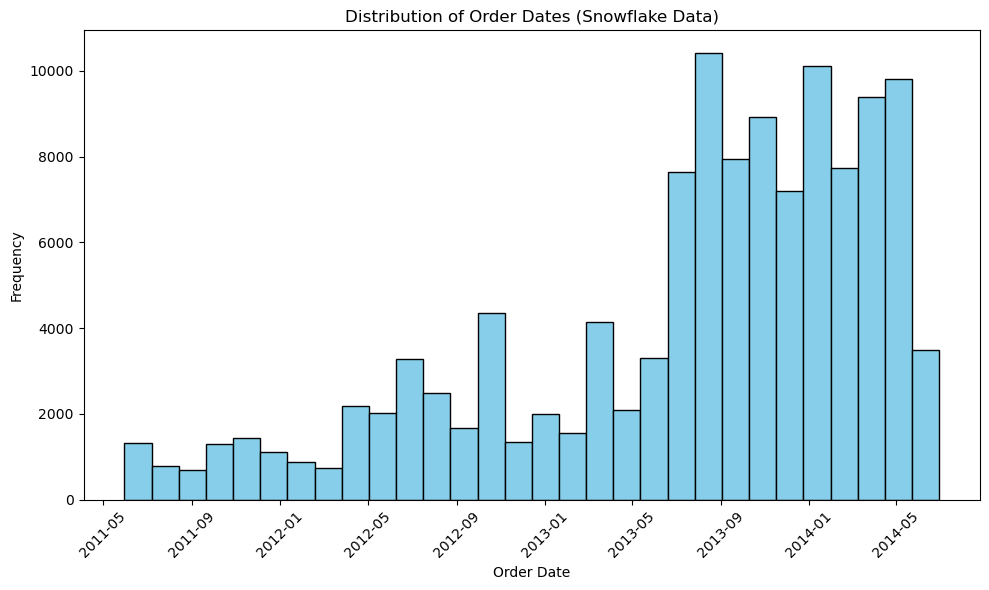

In [17]:
#check date ranges for dataframes Histogram 
plt.figure(figsize=(10, 6))
plt.hist(snowflake_df['OrderDate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Dates (Snowflake Data)')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

###### MSSQL Dataframe

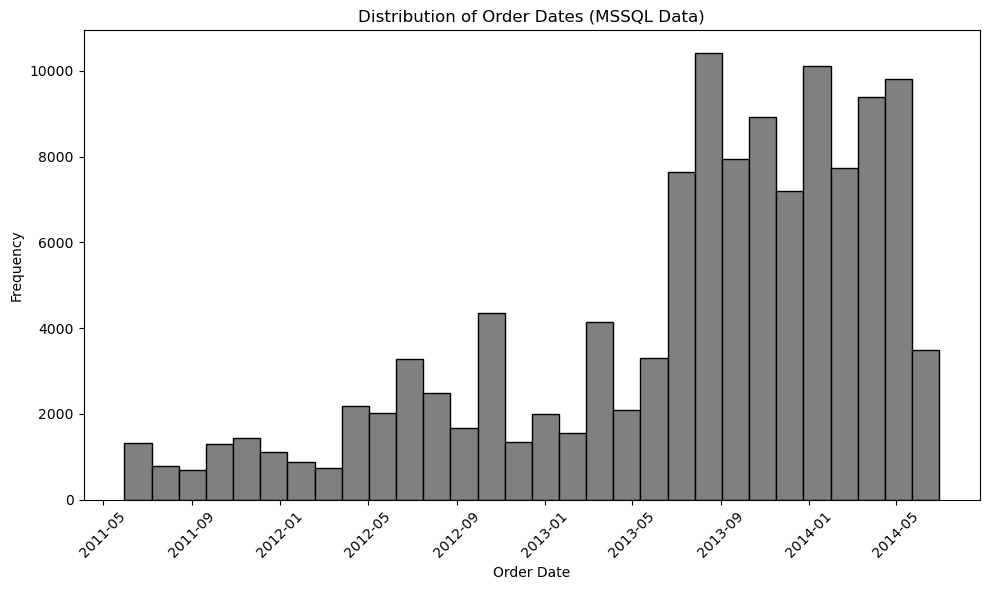

In [20]:
#check date ranges for dataframes Histogram MSSQL
plt.figure(figsize=(10, 6))
plt.hist(sql_df['OrderDate'], bins=30, color='grey', edgecolor='black')
plt.title('Distribution of Order Dates (MSSQL Data)')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### What was the Top 5 Most Ordered Product in this timeframe?

###### Snowflake Dataframe

In [27]:
snowflake_df.groupby(['ProductName'])['OrderQty'].sum().nlargest(5).to_frame()

,OrderQty
ProductName,
AWC Logo Cap,8311
Water Bottle - 30 oz.,6815
"Sport-100 Helmet, Blue",6743
"Long-Sleeve Logo Jersey, L",6592
"Sport-100 Helmet, Black",6532


###### MSSQL Dataframe

In [28]:
sql_df.groupby(['ProductName'])['OrderQty'].sum().nlargest(5).to_frame()

,OrderQty
ProductName,
AWC Logo Cap,8311
Water Bottle - 30 oz.,6815
"Sport-100 Helmet, Blue",6743
"Long-Sleeve Logo Jersey, L",6592
"Sport-100 Helmet, Black",6532


#### What was the most sold product each year?

###### Snowflake Dataframe

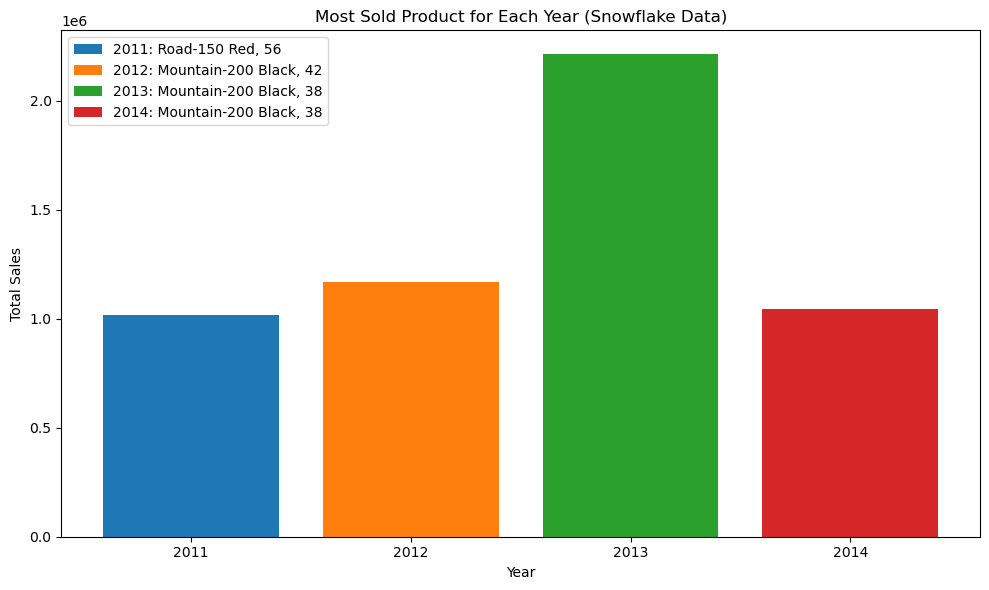

In [37]:
#create columns to add in year
snowflake_df['OrderYear'] = snowflake_df['OrderDate'].dt.year
sql_df['OrderYear'] = sql_df['OrderDate'].dt.year

grouped = snowflake_df.groupby(['OrderYear', 'ProductName'])['LineTotal'].sum().reset_index()

# Find the product with the maximum total sales for each year
max_sales = grouped.loc[grouped.groupby('OrderYear')['LineTotal'].idxmax()]

# Visualize the results
plt.figure(figsize=(10, 6))
for year, group in max_sales.groupby('OrderYear'):
    plt.bar(str(year), group['LineTotal'], label=f'{year}: {group["ProductName"].values[0]}')
plt.title('Most Sold Product for Each Year (Snowflake Data)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

###### MSSQL Dataframe

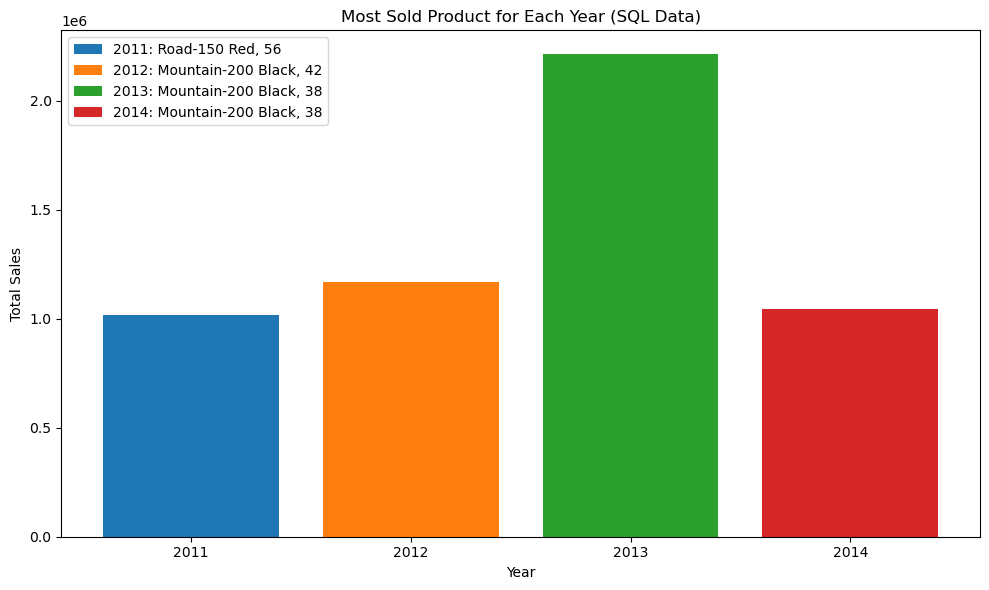

In [38]:
grouped = sql_df.groupby(['OrderYear', 'ProductName'])['LineTotal'].sum().reset_index()

# Find the product with the maximum total sales for each year
max_sales = grouped.loc[grouped.groupby('OrderYear')['LineTotal'].idxmax()]

# Visualize the results
plt.figure(figsize=(10, 6))
for year, group in max_sales.groupby('OrderYear'):
    plt.bar(str(year), group['LineTotal'], label=f'{year}: {group["ProductName"].values[0]}')
plt.title('Most Sold Product for Each Year (SQL Data)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()